# **Machine Learning Project: Sentiment Analysis**

by Yuri Dantas

**Dataset**

The dataset contains all the Twitter mentions of Dell during first three quarters of 2022 (Jan 01 - Sept 30) along with the sentiment and emotions of each tweet. It has about 25k tweets along with:

* Date;

* Timestamp;

* Username and tweet Id;

* Sentiment_score;

* Emotion_score;

* Emotions (joy, love, optimism, pessimism, trust, surprise, anticipation, sadness, anger, disgust and fear);

* Sentiments (positive, neutral and negative)


**Project's goal**:

Build a machine learning algorithm that predicts wheter a tweet contains a positive, neutral or negative sentiment.

## **1. Dataframe**

Loading Libraries

In [1]:
import pandas as pd # For data handling
import numpy as np # For mathematical operations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For data visualization
from time import time # To time our operations

%matplotlib inline
plt.style.use('ggplot')

Load dataframe

In [2]:
df_tweets = pd.read_csv('sentiment-emotion-labelled_Dell_tweets.csv', dtype={'sentiment': 'category', 'emotion':'category'})
df_tweets

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124
...,...,...,...,...,...,...,...,...,...
24965,24965,2022-01-01 02:02:04+00:00,1477097760931336198,@ElDarkAngel2 @GamersNexus @Dell I wouldn't ev...,Eodart,negative,0.682981,anger,0.906309
24966,24966,2022-01-01 01:57:34+00:00,1477096631300415496,@kite_real @GamersNexus @Dell I didn't really ...,Eodart,positive,0.743940,joy,0.951701
24967,24967,2022-01-01 01:36:36+00:00,1477091355629432833,Hey @JoshTheFixer here it is....27 4K UHD USB-...,Corleone250,neutral,0.654463,anticipation,0.471185
24968,24968,2022-01-01 01:31:30+00:00,1477090070830141442,@bravadogaming @thewolfpena @Alienware @intel ...,MrTwistyyy,neutral,0.794049,anticipation,0.747014


Drop unnecessary columns

In [3]:
#Select only the necessary columns
df_tweets = df_tweets[['Text', 'sentiment', 'emotion']]

#Rename column 'Text'
df_tweets.columns = ['text', 'sentiment', 'emotion']

#Display dataframe
df_tweets

,text,sentiment,emotion
0,@Logitech @apple @Google @Microsoft @Dell @Len...,neutral,anticipation
1,@MK_habit_addict @official_stier @MortalKombat...,neutral,joy
2,"As @CRN celebrates its 40th anniversary, Bob F...",positive,joy
3,@dell your customer service is horrible especi...,negative,anger
4,@zacokalo @Dell @DellCares @Dell give the man ...,neutral,anger
...,...,...,...
24965,@ElDarkAngel2 @GamersNexus @Dell I wouldn't ev...,negative,anger
24966,@kite_real @GamersNexus @Dell I didn't really ...,positive,joy
24967,Hey @JoshTheFixer here it is....27 4K UHD USB-...,neutral,anticipation
24968,@bravadogaming @thewolfpena @Alienware @intel ...,neutral,anticipation


Visualize the dataframe

In [4]:
df_tweets.head()

,text,sentiment,emotion
0,@Logitech @apple @Google @Microsoft @Dell @Len...,neutral,anticipation
1,@MK_habit_addict @official_stier @MortalKombat...,neutral,joy
2,"As @CRN celebrates its 40th anniversary, Bob F...",positive,joy
3,@dell your customer service is horrible especi...,negative,anger
4,@zacokalo @Dell @DellCares @Dell give the man ...,neutral,anger


In [5]:
df_tweets.tail()

,text,sentiment,emotion
24965,@ElDarkAngel2 @GamersNexus @Dell I wouldn't ev...,negative,anger
24966,@kite_real @GamersNexus @Dell I didn't really ...,positive,joy
24967,Hey @JoshTheFixer here it is....27 4K UHD USB-...,neutral,anticipation
24968,@bravadogaming @thewolfpena @Alienware @intel ...,neutral,anticipation
24969,@rabia_ejaz @Dell Stopped buying windows lapto...,positive,joy


In [6]:
df_tweets.shape

(24970, 3)

In [7]:
df_tweets.isnull().sum()

text         0
sentiment    0
emotion      0
dtype: int64

In [8]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24970 entries, 0 to 24969
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   text       24970 non-null  object  
 1   sentiment  24970 non-null  category
 2   emotion    24970 non-null  category
dtypes: category(2), object(1)
memory usage: 244.5+ KB


## **2. Exploratory Data Analysis**

### **2.1 Visualization of sentiments**

<Axes: title={'center': 'Count of Sentiments'}, xlabel='sentiment'>

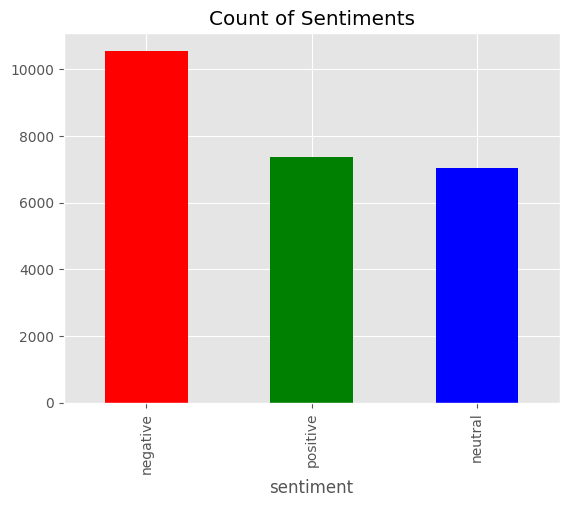

In [9]:
#Count of sentiments
sentiment_count = df_tweets.sentiment.value_counts()

#Define and attribute colors for each label
color_dict = {'negative':'red', 'positive':'green', 'neutral':'blue'}
colors = [color_dict[label] for label in sentiment_count.index]

#Graphic plot
sentiment_count.plot(kind='bar', title = 'Count of Sentiments', color=colors)

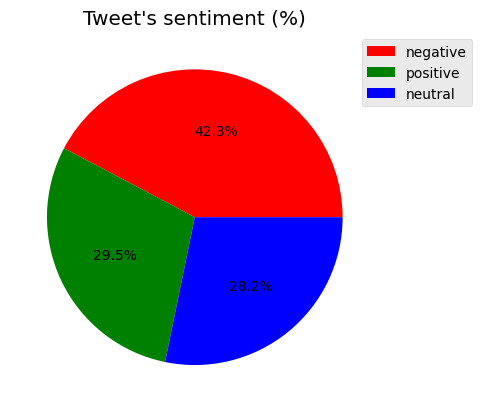

In [10]:
labels=df_tweets['sentiment'].value_counts().index
plt.pie(df_tweets['sentiment'].value_counts(),autopct='%1.1f%%', colors=colors)
plt.legend(labels,bbox_to_anchor=(1.27,1))
plt.title("Tweet's sentiment (%)")
plt.show()

### **2.2 Visualization of emotions**

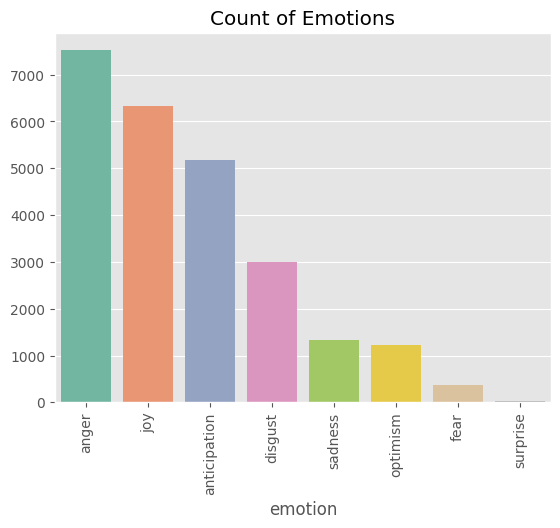

In [11]:
# Count of emotion
emotion_count = df_tweets.emotion.value_counts()

# Sort the emotion counts in ascending order
emotion_count = emotion_count.sort_values(ascending=False)

# Defining color palette
sns.set_palette('Set2')

# Create the bar plot
ax = sns.barplot(x=emotion_count.index, y=emotion_count.values, order=emotion_count.index)

# Set title and labels
ax.set_title('Count of Emotions')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.show()

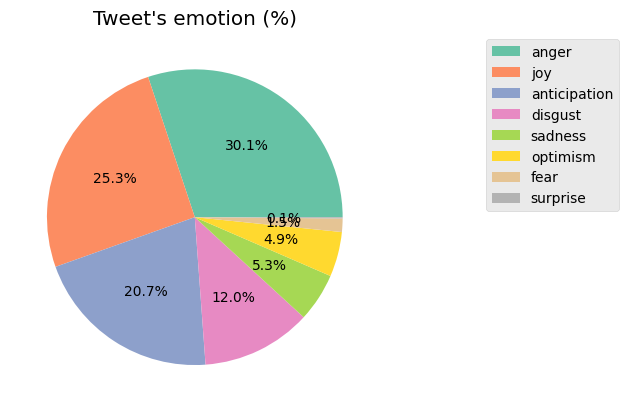

In [12]:
labels=df_tweets['emotion'].value_counts().index
plt.pie(df_tweets['emotion'].value_counts(),autopct='%1.1f%%')
plt.legend(labels,bbox_to_anchor=(1.27,1))
plt.title("Tweet's emotion (%)")
plt.show()

### **2.3 Visualization of emotion in different sentiments**

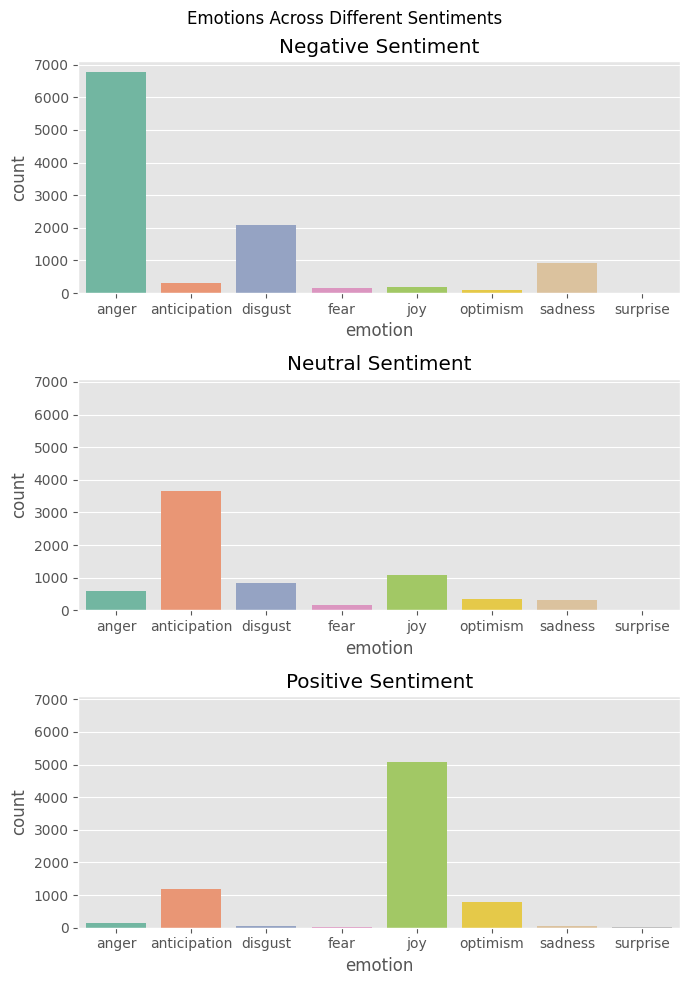

In [13]:
#Creating figure
fig, axes = plt.subplots(3,1, figsize = (7,10), sharey = True)

#Setting main title
plt.suptitle('Emotions Across Different Sentiments')

#Counting emotions by negative sentiment
sns.countplot(data=df_tweets.loc[df_tweets.sentiment == 'negative'], x='emotion', ax= axes[0])
axes[0].title.set_text('Negative Sentiment')

#Counting emotions by neutral sentiment
sns.countplot(data=df_tweets.loc[df_tweets.sentiment == 'neutral'], x='emotion', ax= axes[1])
axes[1].title.set_text('Neutral Sentiment')

#Counting emotions by positive sentiment
sns.countplot(data=df_tweets.loc[df_tweets.sentiment == 'positive'], x='emotion', ax= axes[2])
axes[2].title.set_text('Positive Sentiment')

#Adjusting layout
plt.tight_layout()

## **3. Data preprocessing**

Drop unnecessary column 'emotion'

In [14]:
df_tweets.drop(columns=['emotion'], axis=1, inplace=True)

df_tweets.head()

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\2746967847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets.drop(columns=['emotion'], axis=1, inplace=True)


,text,sentiment
0,@Logitech @apple @Google @Microsoft @Dell @Len...,neutral
1,@MK_habit_addict @official_stier @MortalKombat...,neutral
2,"As @CRN celebrates its 40th anniversary, Bob F...",positive
3,@dell your customer service is horrible especi...,negative
4,@zacokalo @Dell @DellCares @Dell give the man ...,neutral


### **3.1 Treating of categorical variables**

**Column 'sentiment'**: transforming ordinal categorical variables into numbers.
* Positive = 2
* Neutral = 1
* Negative = 0

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
#Set the Label Encoder function
label_encoder = LabelEncoder()

#Apply the Label Encoder in the column 'sentiment'
df_tweets['target'] = label_encoder.fit_transform(df_tweets['sentiment'])

#Show dataframe with the new column 'target'
df_tweets

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\4072189006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['target'] = label_encoder.fit_transform(df_tweets['sentiment'])


,text,sentiment,target
0,@Logitech @apple @Google @Microsoft @Dell @Len...,neutral,1
1,@MK_habit_addict @official_stier @MortalKombat...,neutral,1
2,"As @CRN celebrates its 40th anniversary, Bob F...",positive,2
3,@dell your customer service is horrible especi...,negative,0
4,@zacokalo @Dell @DellCares @Dell give the man ...,neutral,1
...,...,...,...
24965,@ElDarkAngel2 @GamersNexus @Dell I wouldn't ev...,negative,0
24966,@kite_real @GamersNexus @Dell I didn't really ...,positive,2
24967,Hey @JoshTheFixer here it is....27 4K UHD USB-...,neutral,1
24968,@bravadogaming @thewolfpena @Alienware @intel ...,neutral,1


In [17]:
#Drop unnecessary column 'sentiment'
df_tweets.drop(columns=['sentiment'], axis=1, inplace=True)
df_tweets

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\2122156634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets.drop(columns=['sentiment'], axis=1, inplace=True)


,text,target
0,@Logitech @apple @Google @Microsoft @Dell @Len...,1
1,@MK_habit_addict @official_stier @MortalKombat...,1
2,"As @CRN celebrates its 40th anniversary, Bob F...",2
3,@dell your customer service is horrible especi...,0
4,@zacokalo @Dell @DellCares @Dell give the man ...,1
...,...,...
24965,@ElDarkAngel2 @GamersNexus @Dell I wouldn't ev...,0
24966,@kite_real @GamersNexus @Dell I didn't really ...,2
24967,Hey @JoshTheFixer here it is....27 4K UHD USB-...,1
24968,@bravadogaming @thewolfpena @Alienware @intel ...,1


### **3.2 Text preprocessing**

In [18]:
#Loading libraries
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### **3.2.1 Cleaning the text**


Lower case conversion

In [19]:
df_tweets['text'] = df_tweets['text'].apply(lambda tweet: tweet.lower())

df_tweets

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\3902758899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].apply(lambda tweet: tweet.lower())


,text,target
0,@logitech @apple @google @microsoft @dell @len...,1
1,@mk_habit_addict @official_stier @mortalkombat...,1
2,"as @crn celebrates its 40th anniversary, bob f...",2
3,@dell your customer service is horrible especi...,0
4,@zacokalo @dell @dellcares @dell give the man ...,1
...,...,...
24965,@eldarkangel2 @gamersnexus @dell i wouldn't ev...,0
24966,@kite_real @gamersnexus @dell i didn't really ...,2
24967,hey @joshthefixer here it is....27 4k uhd usb-...,1
24968,@bravadogaming @thewolfpena @alienware @intel ...,1


Decontrating: rewriting text without the contrations. Ex.: I'm = I am; aren't = are not ...  

In [20]:
#Function to decontract the text

#Contraction dictionary
contractions = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he had",
"he'll" : "he will",
"he's" : "he is",
"I'd" : "I had",
"I'll" : "I will",
"I'm": "I am",
"I've" : "I have",
"isn't" : "is not",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she had",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they had",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we had",
"we're" : "we are",
"we've" : "we have",
"weren't" : "were not",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who's" : "who had",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"wouldnt" : "would not",
"you'd" : "you had",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"arent" : "are not",
"cant" : "cannot",
"couldnt" : "could not",
"didnt" : "did not",
"doesnt" : "does not",
"dont" : "do not",
"hadnt" : "had not",
"hasnt" : "has not",
"havent" : "have not",
"Id" : "I had",
"Ill" : "I will",
"Im": "I am",
"Ive" : "I have",
"isnt" : "is not",
"lets" : "let us",
"mightnt" : "might not",
"mustnt" : "must not",
"shouldnt" : "should not",
"werent" : "were not",
"gonna" : "going to",
"imma" : "i am going to"
}

#Function
def decontract(word):
    if type(word) is str:
        for key in contractions:
            value = contractions[key]
            word = word.replace(key,value)
        return word
    else:
        return word


In [21]:
#Apply to the 'text' column
df_tweets['text'] = df_tweets['text'].apply(lambda word:decontract(word))

#Show results
df_tweets

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\1210325459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].apply(lambda word:decontract(word))


,text,target
0,@logitech @apple @google @microsoft @dell @len...,1
1,@mk_habit_addict @official_stier @mortalkombat...,1
2,"as @crn celebrates its 40th anniversary, bob f...",2
3,@dell your customer service is horrible especi...,0
4,@zacokalo @dell @dellcares @dell give the man ...,1
...,...,...
24965,@eldarkangel2 @gamersnexus @dell i would not e...,0
24966,@kite_real @gamersnexus @dell i did not really...,2
24967,hey @joshthefixer here it is....27 4k uhd usb-...,1
24968,@bravadogaming @thewolfpena @alienware @intel ...,1


Remove E-mails

In [22]:
#Counting the e-mails
df_tweets['emails'] = df_tweets['text'].apply(lambda tweet : re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',tweet))
df_tweets['emails_count']= df_tweets['emails'].apply(lambda x:len(x))
df_tweets[df_tweets['emails_count']>0]

print(df_tweets['emails_count'].value_counts())

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\1470377531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['emails'] = df_tweets['text'].apply(lambda tweet : re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',tweet))


emails_count
0    24937
1       31
2        2
Name: count, dtype: int64


C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\1470377531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['emails_count']= df_tweets['emails'].apply(lambda x:len(x))


In [23]:
#Remove the e-mails
df_tweets['text'] = df_tweets['text'].apply(lambda x:re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',' ',x))

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\3467747824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].apply(lambda x:re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',' ',x))


In [24]:
#Verifying if the e-mails where removed
df_tweets['emails'] = df_tweets['text'].apply(lambda tweet : re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',tweet))
df_tweets['emails_count']= df_tweets['emails'].apply(lambda x:len(x))
df_tweets[df_tweets['emails_count']>0]

print(df_tweets['emails_count'].value_counts())

emails_count
0    24970
Name: count, dtype: int64


C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\1770564185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['emails'] = df_tweets['text'].apply(lambda tweet : re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',tweet))
C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\1770564185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['emails_count']= df_tweets['emails'].apply(lambda x:len(x))


In [25]:
#Drop unnecessary columns
df_tweets.drop(columns=['emails', 'emails_count'], axis=1, inplace=True)

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\2161958142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets.drop(columns=['emails', 'emails_count'], axis=1, inplace=True)


Remove hyperlink

In [26]:
#Count the hyperlink
df_tweets['hyperlink'] = df_tweets['text'].apply(lambda tweet : re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',tweet))
df_tweets['hyperlink_count']= df_tweets['hyperlink'].apply(lambda x:len(x))
df_tweets[df_tweets['hyperlink_count']>0]

print(df_tweets['hyperlink_count'].value_counts())

hyperlink_count
0    16998
1     5802
2     2109
3       47
4        7
5        6
7        1
Name: count, dtype: int64


C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\2303692841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['hyperlink'] = df_tweets['text'].apply(lambda tweet : re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',tweet))
C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\2303692841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['hyperlink_count']= df_tweets['hyperlink'].apply(lambda x:len(x))


In [27]:
#Remove the hyperlink
df_tweets['text']=df_tweets['text'].apply(lambda tweet:re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',' ',tweet))

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\3258942314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text']=df_tweets['text'].apply(lambda tweet:re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',' ',tweet))


In [28]:
#Verifying if the hyperlinks where removed
df_tweets['hyperlink'] = df_tweets['text'].apply(lambda tweet : re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',tweet))
df_tweets['hyperlink_count']= df_tweets['hyperlink'].apply(lambda x:len(x))
df_tweets[df_tweets['hyperlink_count']>0]

print(df_tweets['hyperlink_count'].value_counts())

hyperlink_count
0    24970
Name: count, dtype: int64


C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\4253409194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['hyperlink'] = df_tweets['text'].apply(lambda tweet : re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',tweet))
C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\4253409194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['hyperlink_count']= df_tweets['hyperlink'].apply(lambda x:len(x))


In [29]:
#Drop unnecessary columns
df_tweets.drop(columns=['hyperlink', 'hyperlink_count'], axis=1, inplace=True)

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\1010201067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets.drop(columns=['hyperlink', 'hyperlink_count'], axis=1, inplace=True)


Remove RT

In [30]:
df_tweets['text'] = df_tweets['text'].apply(lambda tweet:re.sub(r'RT[\s]+', '', tweet))

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\98494927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].apply(lambda tweet:re.sub(r'RT[\s]+', '', tweet))


Remove empty spaces

In [31]:
df_tweets['text'] = df_tweets['text'].apply(lambda tweet:" ".join(tweet.split()))

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\3110233590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].apply(lambda tweet:" ".join(tweet.split()))


Remove HTLM tags

In [32]:
#Libray import
from bs4 import BeautifulSoup
import lxml #pip install lxml if necessary

In [33]:
#Remove the html tag
df_tweets['text'] = df_tweets['text'].apply(lambda tweet:BeautifulSoup(tweet,'lxml').get_text())

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\1367198822.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df_tweets['text'] = df_tweets['text'].apply(lambda tweet:BeautifulSoup(tweet,'lxml').get_text())
C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\1367198822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].apply(lambda tweet:BeautifulSoup(tweet,'lxml').get_text())


Remove user mentions (@user)

In [34]:
#Deleting user mention (@user):
df_tweets['text'] = df_tweets['text'].apply(lambda tweet:re.sub(r'@[A-Za-z0-9]+', '', tweet))

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\1021781887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].apply(lambda tweet:re.sub(r'@[A-Za-z0-9]+', '', tweet))


Remove accented characters

In [35]:
#Import library
import unicodedata

#Define function
def remove_acented_chars(x):
    tweet = unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return tweet

In [36]:
#Apply function
df_tweets['text'] = df_tweets['text'].apply(remove_acented_chars)

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\2836027268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].apply(remove_acented_chars)


Remove remaining special caracters

In [37]:
df_tweets['text'] = df_tweets['text'].apply(lambda tweet:re.sub(r'[^A-Za-z\s]', '', tweet))

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\264323333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].apply(lambda tweet:re.sub(r'[^A-Za-z\s]', '', tweet))


#### **3.2.2 Filter words and tokenize the text**

Remove stop words: stop words are used for grammatical flow and connecting sentences. It does not convey any meaning. For example: I ,are, my, me etc.

In [38]:
#Create the function to remove stop words
def remove_stop_words(tweet):
    stop_words = set(stopwords.words('english'))
    filtered_tweet = " ".join([word for word in tweet.split() if word not in stop_words])

    return filtered_tweet

In [39]:
df_tweets['text'] = df_tweets['text'].apply(remove_stop_words)

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\1072116447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].apply(remove_stop_words)


Convert verbs into root form

In [40]:
import spacy #pip install spacy(if necessary)

nlp = spacy.load('en_core_web_sm') #python -m spacy download en_core_web_sm (if necessary)

In [41]:
#Define function
def root_form(tweet):
    tweet_list =[]
    doc = nlp(tweet)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma =='-PRON-' or lemma =='be':
               lemma = token.text 
        tweet_list.append(lemma)

    return " ".join(tweet_list)

In [42]:
df_tweets['text'] = df_tweets['text'].apply(root_form)

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\1018130657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].apply(root_form)


Common words removal

In [43]:
#Display 20 most common words
text = " ".join(df_tweets['text'])

text = text.split()

word_freq = pd.Series(text).value_counts()

f20 = word_freq[:20]

f20

dell        5769
laptop      5074
get         2901
service     2574
buy         2121
not         1966
work        1934
new         1915
customer    1914
one         1836
I           1681
support     1659
time        1562
use         1550
like        1548
day         1508
go          1416
issue       1377
make        1270
year        1229
Name: count, dtype: int64

In [44]:
#Filter common words
df_tweets['text'] = df_tweets['text'].apply(lambda tweet :" ".join([word for word in tweet.split() if tweet not in f20]))

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\3615242272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].apply(lambda tweet :" ".join([word for word in tweet.split() if tweet not in f20]))


Remove rare words

In [45]:
#Display 20 rarest words
rare20 = word_freq[-20:]

print(rare20)

commer                   1
blockchainforgoodclub    1
referb                   1
barto                    1
sutton                   1
cw                       1
neuronlike               1
cybern                   1
teamwhich                1
bizzyjay                 1
nta                      1
tnzh                     1
whic                     1
ahoy                     1
memorydue                1
usne                     1
mujhse                   1
udhar                    1
utha                     1
goku                     1
Name: count, dtype: int64


In [46]:
#Filter rare words
df_tweets['text'] = df_tweets['text'].apply(lambda tweet :" ".join([word for word in tweet.split() if tweet not in rare20]))

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\4237317111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].apply(lambda tweet :" ".join([word for word in tweet.split() if tweet not in rare20]))


* Tokenize the text

In [47]:
#define function
def tokenize(tweet):
    tokens = word_tokenize(tweet)

    return tokens

In [48]:
#df_tweets['text'] = df_tweets['text'].apply(tokenize)

## **4 Machine Learning Model using Natural Language Processing (NLP)**

Load Libraries

In [49]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM,Bidirectional
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping
from gensim.models import Word2Vec
from sklearn.metrics import classification_report ,accuracy_score
from tensorflow.keras.layers import SpatialDropout1D

### **4.1 Word Embedding** 

Word embedding is a general term that refers to the technique used in Natural Language Processing (NLP) to represent words as dense vectors. It involves mapping words from a vocabulary to continuous vector representations, where the vectors capture semantic and syntactic relationships between words.

The primary goal of word embedding is to capture the meaning of words and their relationships based on their usage in a given corpus of text. By representing words as vectors, it becomes possible to perform mathematical operations on them and measure their semantic similarities or differences.

#### **4.1.1 Transforming words into numbers**

Discovering the number of unique words

In [50]:
# Concatenar todas as palavras em uma única string
all_words = ' '.join(df_tweets['text'].astype(str))

# Dividir a string em palavras individuais
words_list = all_words.split()

# Criar um conjunto (set) das palavras para obter os valores únicos
unique_words = set(words_list)

# Calcular o número de palavras únicas
num_unique_words = len(unique_words)

print(f"Number of unique words: {num_unique_words}")

Number of unique words: 23183


Creating encoded vectors for each tweet

In [51]:
#Encode the words -> each word receives a unique number
encoded_texts = [one_hot(d, num_unique_words) for d in df_tweets['text']]

#Show results
encoded_texts

[[2202,
  13830,
  17372,
  20827,
  1007,
  8742,
  9742,
  8626,
  17527,
  22123,
  7678,
  14379,
  1896,
  8545,
  19871,
  18822,
  20263,
  9742,
  5078,
  7971,
  17002,
  4940,
  6265,
  4844,
  8279],
 [3422,
  19635,
  13287,
  9178,
  2518,
  312,
  312,
  15308,
  18193,
  11660,
  19401,
  8486,
  3719,
  13687,
  19417],
 [1367,
  16507,
  4910,
  6928,
  19166,
  2089,
  5753,
  14757,
  5593,
  13253,
  850,
  6194,
  11599,
  18626,
  22442],
 [22299,
  20236,
  708,
  15871,
  4313,
  14138,
  2198,
  2908,
  12302,
  9178,
  18162,
  4636,
  3778,
  18725,
  9921,
  6578,
  21585,
  15656,
  1383],
 [21901, 14689, 10119],
 [15538,
  13309,
  16277,
  9173,
  2518,
  2643,
  16078,
  22828,
  18845,
  12306,
  16263,
  10253,
  3759,
  3912,
  9335,
  10715,
  2518,
  1102,
  15538,
  3021,
  1605,
  14685],
 [13427, 2731, 21780],
 [7024,
  18523,
  22130,
  20168,
  20556,
  18523,
  18725,
  3225,
  4362,
  13218,
  13427,
  22621,
  1658,
  21277,
  15926,
  18199

Discovering the length of the biggest list in 'encoded_texts'

In [52]:
max_length_we = 0

for list in encoded_texts:
    length = len(list)
    if length > max_length_we:
        max_length_we = length

print(f"Maximum length: {max_length_we}")

Maximum length: 70


Padding the vectors with the number zero so they have the same size

In [53]:
#Use pad_sequences
padded_tweets = pad_sequences(encoded_texts, maxlen=max_length_we, padding='post')

#Show results
print(padded_tweets)

[[ 2202 13830 17372 ...     0     0     0]
 [ 3422 19635 13287 ...     0     0     0]
 [ 1367 16507  4910 ...     0     0     0]
 ...
 [ 7297 11026 10089 ...     0     0     0]
 [20182  8731  6511 ...     0     0     0]
 [ 3640 15553 21585 ...     0     0     0]]


### 4.1.2 Creating the word embedding model

Setting X and Y

In [54]:
X_we = padded_tweets

y_we = to_categorical(df_tweets['target'])

Train and test split

In [55]:
X_we_train, X_we_test, y_we_train, y_we_test = train_test_split(X_we, y_we, test_size=0.2, random_state=42)

print(f'X_train shape: {X_we_train.shape}')
print(f'X_test shape: {X_we_test.shape}')

X_train shape: (19976, 70)
X_test shape: (4994, 70)


Word Embedding Model

In [56]:
#Setting up for cross validation
k = 5  # number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

#store performance metrics in each fold
accuracies = []

In [57]:
#Break when val_loss increases
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)

In [125]:
for train_index, val_index in kf.split(X_we_train, y_we_train):

    X_we_train, X_we_val = X_we[train_index], X_we[val_index]
    y_we_train, y_we_val = y_we[train_index], y_we[val_index]

    # Create the model
    embeded_vector_size = 300

    model_we = Sequential()

    model_we.add(Embedding( num_unique_words, 
                            embeded_vector_size, 
                            input_length=max_length_we,
                            name="embedding"))

    # Add Dropout layer
    #model_we.add(SpatialDropout1D(0.2)) # For preventing overfitting
    #model_we.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))

    #model_we.add(Dense(1024, activation='relu'))
    #model_we.add(Dropout(0.3))

    model_we.add(Flatten())

    # Softmax function
    model_we.add(Dense(3, activation='softmax'))

    #Compile
    model_we.compile(optimizer='adam', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

    # Trainning the model
    history_we = model_we.fit(X_we_train, 
                              y_we_train, 
                              validation_data=(X_we_val, y_we_val), 
                              epochs=5, 
                              verbose=1,
                              callbacks=[callback]
                              )
    
    # Evaluate the model
    loss, accuracy = model_we.evaluate(X_we_test, y_we_test)

    # Append the metrics
    accuracies.append(accuracy)

Epoch 1/5
164/164 [==============================] - 13s 75ms/step - loss: 0.8235 - accuracy: 0.6221 - val_loss: 0.6450 - val_accuracy: 0.7282
Epoch 2/5
164/164 [==============================] - 12s 72ms/step - loss: 0.3950 - accuracy: 0.8682 - val_loss: 0.5768 - val_accuracy: 0.7534
Epoch 3/5
164/164 [==============================] - 12s 72ms/step - loss: 0.1676 - accuracy: 0.9589 - val_loss: 0.6066 - val_accuracy: 0.7496
Epoch 4/5
164/164 [==============================] - 12s 73ms/step - loss: 0.0813 - accuracy: 0.9845 - val_loss: 0.6397 - val_accuracy: 0.7473
Epoch 5/5
157/157 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.7423
Epoch 1/5
164/164 [==============================] - 12s 72ms/step - loss: 0.8295 - accuracy: 0.6158 - val_loss: 0.6367 - val_accuracy: 0.7397
Epoch 2/5
164/164 [==============================] - 12s 72ms/step - loss: 0.3988 - accuracy: 0.8703 - val_loss: 0.5566 - val_accuracy: 0.7725
Epoch 3/5
164/164 [========================

In [126]:
#Calculate the mean and standart deviation of the accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

#Print the results
print(f'Average accuracy: {mean_accuracy * 100:.2f}%')
print(f'Standart deviation of accuracy: {std_accuracy * 100:.2f}%')

Average accuracy: 72.11%
Standart deviation of accuracy: 16.27%


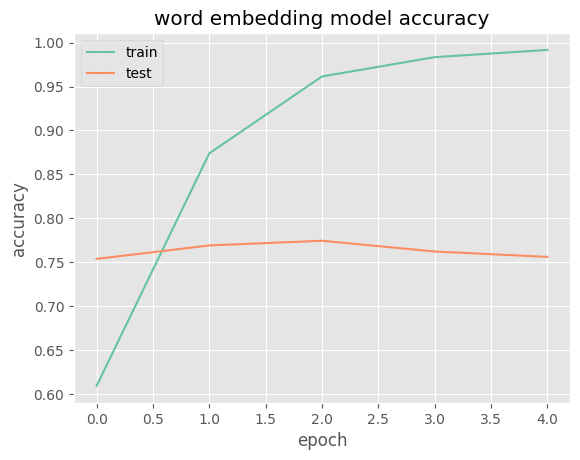

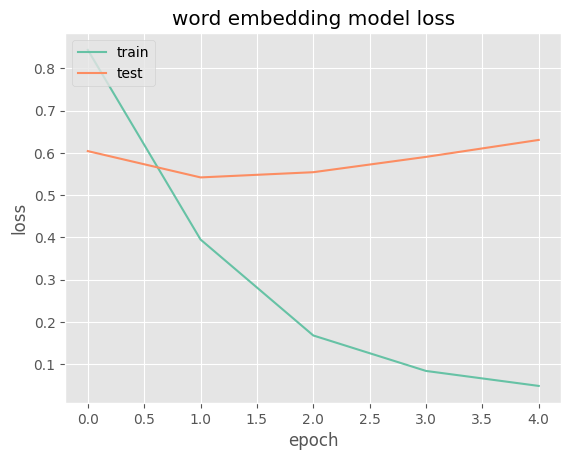

In [127]:
# summarize history for accuracy
plt.plot(history_we.history['accuracy'])
plt.plot(history_we.history['val_accuracy'])
plt.title('word embedding model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_we.history['loss'])
plt.plot(history_we.history['val_loss'])
plt.title('word embedding model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Definitive Model

In [128]:
embeded_vector_size = 300

model_we = Sequential()

model_we.add(Embedding(num_unique_words, 
                       embeded_vector_size, 
                       input_length=max_length_we,
                       name="embedding"))

# Add hidden layer
#model_we.add(SpatialDropout1D(0.3))
#model_we.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))

#model_we.add(Dense(1024, activation='relu'))
#model_we.add(Dropout(0.8))

model_we.add(Flatten())

# Softmax function
model_we.add(Dense(3, activation='softmax'))

In [129]:
#Compile
model_we.compile(optimizer='adam', 
                 loss='categorical_crossentropy', 
                 metrics=['accuracy'])

print(model_we.summary())

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 70, 300)           6954900   
                                                                 
 flatten_44 (Flatten)        (None, 21000)             0         
                                                                 
 dense_44 (Dense)            (None, 3)                 63003     
                                                                 
Total params: 7,017,903
Trainable params: 7,017,903
Non-trainable params: 0
_________________________________________________________________
None


In [130]:
#Fit
model_we.fit(X_we_train, 
             y_we_train, 
             validation_data=(X_we_val, y_we_val), 
             epochs=5, 
             verbose=1)

Epoch 1/5
164/164 [==============================] - 12s 71ms/step - loss: 0.8338 - accuracy: 0.6199 - val_loss: 0.6037 - val_accuracy: 0.7586
Epoch 2/5
164/164 [==============================] - 11s 70ms/step - loss: 0.3954 - accuracy: 0.8688 - val_loss: 0.5404 - val_accuracy: 0.7754
Epoch 3/5
164/164 [==============================] - 11s 69ms/step - loss: 0.1711 - accuracy: 0.9565 - val_loss: 0.5624 - val_accuracy: 0.7632
Epoch 4/5
164/164 [==============================] - 11s 69ms/step - loss: 0.0847 - accuracy: 0.9840 - val_loss: 0.6023 - val_accuracy: 0.7639
Epoch 5/5
164/164 [==============================] - 11s 69ms/step - loss: 0.0505 - accuracy: 0.9912 - val_loss: 0.6261 - val_accuracy: 0.7639


In [141]:
# evaluate the model
loss, accuracy = model_we.evaluate(X_we_test, y_we_test)
print(f'Accuracy (Validation Set): {accuracy*100:.2f}%')

157/157 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.7407
Accuracy (Validation Set): 74.07%


Prediction

In [132]:
y_we_pred = (model_we.predict(X_we_test) >= 0.5).astype('int')

157/157 [==============================] - 0s 2ms/step


In [142]:
acc_score_we = accuracy_score(y_we_test, y_we_pred)

print(f'Accuracy (Test Set): {acc_score_we*100:.2f} %')

Accuracy (Test Set): 71.77 %


Classification Report interpretation:

* **Precision:** The ability of the model to correctly identify positive instances among the predicted positive instances.
* **Recall:** The ability of the model to correctly identify positive instances among the true positive instances.
* **F1-score:** The weighted average of precision and recall, providing a single metric that balances both metrics.
* **Support:** The number of occurrences of each class in the true labels.
* **Micro average:** Calculated by considering all classes together and provides an overall performance measure

In [134]:
print(classification_report(y_we_test, y_we_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      2065
           1       0.68      0.58      0.63      1468
           2       0.77      0.68      0.73      1461

   micro avg       0.76      0.72      0.74      4994
   macro avg       0.75      0.70      0.72      4994
weighted avg       0.76      0.72      0.74      4994
 samples avg       0.72      0.72      0.72      4994



c:\Users\Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **4.2 Word Embedding Model with Word2Vector**

Word2Vec is a specific algorithm for generating word embeddings.
It was introduced by Tomas Mikolov et al. from Google in 2013 and has gained widespread popularity in the NLP community.
Word2Vec specifically focuses on learning word embeddings by training a neural network on a large corpus of text data. 
The trained Word2Vec model produces word embeddings that capture semantic relationships between words based on their co-occurrence patterns in the training data.

#### **4.2.1 Train Word2Vec model**

Detect common phrases (bigram) for bulding the corpus

In [70]:
from gensim.models.phrases import Phrases, Phraser

In [71]:
#Transform the tweets into a list of list of words
words_list = [row.split() for row in df_tweets['text']]

#Create relevant phrases from the list of words
phrases = Phrases(words_list, min_count=30, progress_per=10000)

#Use phraser() to cut down memory consumption by discarding model state not strictly needed for the bigram detection task
bigram = Phraser(phrases)

#Transform the corpus (tweets) based on the bigrams detected
tweets = bigram[words_list]

In [72]:
#Show vocabulary
for tweet in tweets:
    print(tweet)

['whatif', 'qwerty', 'modify', 'programmer', 'thing', 'like', 'bracket', 'paren', 'quote', 'operator', 'etc', 'move', 'middle', 'near', 'gh', 'splitting', 'leftright', 'bracket', 'separate', 'hand', 'relieve', 'less', 'dextrous', 'pinky', 'finger']
['habitaddict', 'stier', 'get', 'new', 'laptop', 'one', 'one', 'year_old', 'triple', 'price', 'though', 'much', 'high', 'utility']
['celebrate', 'th', 'anniversary', 'bob', 'faletra', 'speak', 'milestone', 'company', 'personality', 'help', 'build', 'channel', 'crn', 'podcast', 'internationalpodcastday']
['customer_service', 'horrible', 'especially', 'agent', 'syedfaisal', 'make', 'experience', 'purchase', 'new', 'computer', 'downright', 'awful', 'ill', 'reconsider', 'ever', 'buy', 'dell', 'future']
['give', 'man', 'pay']
['screenshot_act', 'website_latitude', 'laptop', 'keep', 'freeze', 'last', 'time', 'image', 'cut', 'video_blind', 'work', 'dead', 'delllatitude_laptop', 'google', 'screenshot', 'actingup', 'frozen', 'rip']
['alien', 'shape',

Set up model parameters

**Parameters**

* **min_count** = int - Ignores all words with total absolute frequency lower than this - (2, 100)
* **window** = int - The maximum distance between the current and predicted word within a sentence. E.g. window words on the left and window words on the left of our target - (2, 10)
* **vector_size** = int - Dimensionality of the feature vectors. - (50, 300)
* **sample** = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)
* **alpha** = float - The initial learning rate - (0.01, 0.05)
* **min_alpha** = float - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00
* **negative** = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)
* **workers** = int - Use these many worker threads to train the model (=faster training with multicore machines)

In [73]:
w2v_model = Word2Vec(min_count=20,
                     window=5,
                     vector_size = 300,
                     sample=6e-5, 
                     alpha=0.05, 
                     min_alpha=0.0007, 
                     negative=20)

Build the vocabulary

In [74]:
w2v_model.build_vocab(tweets, progress_per=10000)

Pre-Trainning

**Parameters**:

* **total_examples** = int - Count of sentences;
* **epochs** = int - Number of iterations (epochs) over the corpus - [10, 20, 30]

In [75]:
w2v_model.train(tweets, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(3037815, 9198150)

After the model pre-training, call init_sims() to make the model much more memory-efficient

In [76]:
w2v_model.init_sims(replace=True)

C:\Users\Gamer\AppData\Local\Temp\ipykernel_22816\514372312.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


#### **4.2.2 Generate Tweet Vectors** 

Creating encoded vectors for each tweet

In [77]:
#Load Library
from keras.preprocessing.text import Tokenizer

#Set Tokenizer function and apply it to the vocabulary
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)

#Register the tokens in X
X = tokenizer.texts_to_sequences(tweets)

In [78]:
#Word to numerical representation
word_index = tokenizer.word_index

for word,index in word_index.items():

    print(f'{word} --> {index}')
    
    if index==10:
        break

dell --> 1
laptop --> 2
get --> 3
buy --> 4
one --> 5
work --> 6
new --> 7
service --> 8
use --> 9
day --> 10


Discovering the length of the biggest vector

In [80]:
max_length_w2v = 0

for list in X:
    length = len(list)
    if length > max_length_w2v:
        max_length_w2v = length

print(f"Maximum length: {max_length_w2v}")


Maximum length: 43


Padding the vectors with the number zero so they have the same size

In [81]:
#Use pad_sequences
X_w2v = pad_sequences(X, maxlen=max_length_w2v, padding='post')

#Show results
print(X_w2v)

[[10368  7450  3876 ...     0     0     0]
 [ 7454 10372     3 ...     0     0     0]
 [ 1425   124  2134 ...     0     0     0]
 ...
 [  144   138  3789 ...     0     0     0]
 [  545    12  1984 ...     0     0     0]
 [ 3577   133     4 ...     0     0     0]]


Discovering vocabulary size

In [82]:
vocab_size = len(tokenizer.word_index)+1
print(f'Vocabulary size: {vocab_size}')

Vocabulary size: 23294


#### **4.2.3 Word2Vector Model**

Setting weigth matrix for the model

In [83]:
embedding_dim = 300

# Define function to create weight_matrix
def embedding_matrix(model,vocab):

    # total vocabulary size +1 : 0 for unkown words; vocabulary usually starts with 1
    vocab_size = len(word_index)+1

    # define weight matrix dimensions with all zeros
    emb_matrix = np.zeros((vocab_size, embedding_dim))
    
    for word, i in word_index.items():
        if word in model.wv:
            emb_matrix[i] = model.wv[word]
    
    return emb_matrix

In [84]:
emb_vectors = embedding_matrix(w2v_model, word_index)
emb_vectors.shape

(23294, 300)

Model 

In [85]:
#Setting the labels
y_w2v = to_categorical(df_tweets['target'])
y_w2v.shape

(24970, 3)

In [86]:
#Train and test split
X_w2v_train, X_w2v_test, y_w2v_train, y_w2v_test = train_test_split(X_w2v, y_w2v, test_size=0.2, random_state=42)

print(f'X_train shape: {X_w2v_train.shape}')
print(f'X_test shape: {X_w2v_test.shape}')

X_train shape: (19976, 43)
X_test shape: (4994, 43)


In [105]:
#Setting up for cross validation
k = 5  # number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

#store performance metrics in each fold
accuracies_w2v = []

In [114]:
for train_index, val_index in kf.split(X_w2v, y_w2v):
    X_w2v_train, X_w2v_val = X_w2v[train_index], X_w2v[val_index]
    y_w2v_train, y_w2v_val = y_w2v[train_index], y_w2v[val_index]

    # Create the model
    model_w2v = Sequential()

    model_w2v.add(Embedding(vocab_size, 
                            embedding_dim, 
                            input_length=max_length_w2v, 
                            weights=[emb_vectors], 
                            trainable=False))

    model_w2v.add(SpatialDropout1D(0.3))
    model_w2v.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))

    model_w2v.add(Flatten())

    model_w2v.add(Dense(3, activation='softmax'))

    model_w2v.compile(optimizer='adam', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

    # Train the model on the training data
    history_w2v = model_w2v.fit(X_w2v_train, 
                                y_w2v_train,
                                validation_data = (X_w2v_val, y_w2v_val),  
                                epochs=20, 
                                verbose=1)
    
    # Evaluate the model on the validation data
    loss, accuracy = model_w2v.evaluate(X_w2v_val, y_w2v_val)
    accuracies_w2v.append(accuracy)


Epoch 1/20
625/625 [==============================] - 91s 142ms/step - loss: 0.7739 - accuracy: 0.6445 - val_loss: 0.7178 - val_accuracy: 0.6776
Epoch 2/20
625/625 [==============================] - 87s 139ms/step - loss: 0.7291 - accuracy: 0.6821 - val_loss: 0.7228 - val_accuracy: 0.6828
Epoch 3/20
625/625 [==============================] - 86s 137ms/step - loss: 0.7067 - accuracy: 0.6955 - val_loss: 0.6710 - val_accuracy: 0.7177
Epoch 4/20
625/625 [==============================] - 86s 137ms/step - loss: 0.6799 - accuracy: 0.7070 - val_loss: 0.6505 - val_accuracy: 0.7227
Epoch 5/20
625/625 [==============================] - 84s 134ms/step - loss: 0.6665 - accuracy: 0.7130 - val_loss: 0.6382 - val_accuracy: 0.7285
Epoch 6/20
625/625 [==============================] - 84s 134ms/step - loss: 0.6576 - accuracy: 0.7153 - val_loss: 0.6599 - val_accuracy: 0.7211
Epoch 7/20
625/625 [==============================] - 84s 134ms/step - loss: 0.6511 - accuracy: 0.7182 - val_loss: 0.6340 - val_ac

In [117]:
#Calculate the mean and standart deviation of the accuracies
mean_accuracy_w2v = np.mean(accuracies_w2v)
std_accuracy_w2v = np.std(accuracies_w2v)

#Print the results
print(f'Average accuracy: {mean_accuracy_w2v * 100:.2f}%')
print(f'Standart deviation of accuracy: {std_accuracy_w2v * 100:.2f}%')

Average accuracy: 74.12%
Standart deviation of accuracy: 0.91%


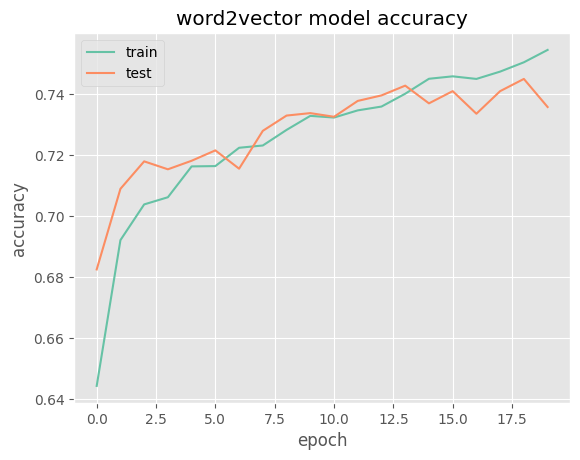

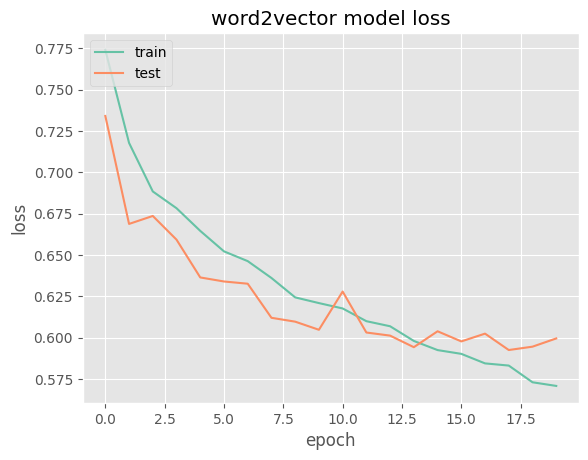

In [116]:
# summarize history for accuracy
plt.plot(history_w2v.history['accuracy'])
plt.plot(history_w2v.history['val_accuracy'])
plt.title('word2vector model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_w2v.history['loss'])
plt.plot(history_w2v.history['val_loss'])
plt.title('word2vector model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Definitive model

In [135]:
model_w2v = Sequential()

model_w2v.add(Embedding(vocab_size, 
                        embedding_dim, 
                        input_length=max_length_w2v, 
                        weights=[emb_vectors], 
                        trainable=False))

model_w2v.add(SpatialDropout1D(0.3))
model_w2v.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))

model_w2v.add(Flatten())

model_w2v.add(Dense(3, activation='softmax'))

#Compile
model_w2v.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

model_w2v.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 43, 300)           6988200   
                                                                 
 spatial_dropout1d_29 (Spati  (None, 43, 300)          0         
 alDropout1D)                                                    
                                                                 
 lstm_24 (LSTM)              (None, 100)               160400    
                                                                 
 flatten_45 (Flatten)        (None, 100)               0         
                                                                 
 dense_45 (Dense)            (None, 3)                 303       
                                                                 
Total params: 7,148,903
Trainable params: 160,703
Non-trainable params: 6,988,200
_____________________________________

In [136]:
# Trainning the model
model_w2v.fit(X_w2v_train, 
              y_w2v_train,
              validation_data = (X_w2v_val, y_w2v_val),  
              epochs=20, 
              verbose=1,
              callbacks=[callback])

Epoch 1/20


625/625 [==============================] - 95s 148ms/step - loss: 0.7677 - accuracy: 0.6525 - val_loss: 0.6761 - val_accuracy: 0.7064
Epoch 2/20
625/625 [==============================] - 92s 147ms/step - loss: 0.7119 - accuracy: 0.6973 - val_loss: 0.6627 - val_accuracy: 0.7117
Epoch 3/20
625/625 [==============================] - 92s 147ms/step - loss: 0.6914 - accuracy: 0.7059 - val_loss: 0.6711 - val_accuracy: 0.7123
Epoch 4/20
625/625 [==============================] - 93s 149ms/step - loss: 0.6773 - accuracy: 0.7096 - val_loss: 0.6366 - val_accuracy: 0.7215
Epoch 5/20
625/625 [==============================] - 92s 148ms/step - loss: 0.6696 - accuracy: 0.7122 - val_loss: 0.6631 - val_accuracy: 0.7159
Epoch 6/20
625/625 [==============================] - 93s 149ms/step - loss: 0.6544 - accuracy: 0.7179 - val_loss: 0.6407 - val_accuracy: 0.7245
Epoch 7/20
625/625 [==============================] - 94s 150ms/step - loss: 0.6491 - accuracy: 0.7200 - val_loss: 0.6219 - val_accuracy: 0.7

In [137]:
# Evaluate hte w2v model
loss, accuracy = model_w2v.evaluate(X_w2v_test, y_w2v_test)
print(f'Accuracy (Validation Set): {accuracy*100:.2f}%')

  1/157 [..............................] - ETA: 11s - loss: 0.3998 - accuracy: 0.8438

157/157 [==============================] - 8s 48ms/step - loss: 0.5406 - accuracy: 0.7751
Accuracy (Validation Set): 77.51%


Prediction

In [138]:
y_w2v_pred = (model_w2v.predict(X_w2v_test) >= 0.5).astype('int')

157/157 [==============================] - 8s 48ms/step


In [139]:
acc_score_w2v = accuracy_score(y_w2v_test, y_w2v_pred)
print(f'Accuracy (Test Set): {acc_score_w2v*100:.2f} %')

Accuracy (Test Set): 73.81 %


Classification Report interpretation:

* **Precision:** The ability of the model to correctly identify positive instances among the predicted positive instances.
* **Recall:** The ability of the model to correctly identify positive instances among the true positive instances.
* **F1-score:** The weighted average of precision and recall, providing a single metric that balances both metrics.
* **Support:** The number of occurrences of each class in the true labels.
* **Micro average:** Calculated by considering all classes together and provides an overall performance measure

In [140]:
print(classification_report(y_w2v_test, y_w2v_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2065
           1       0.69      0.67      0.68      1468
           2       0.84      0.72      0.77      1461

   micro avg       0.80      0.74      0.77      4994
   macro avg       0.80      0.73      0.76      4994
weighted avg       0.80      0.74      0.77      4994
 samples avg       0.74      0.74      0.74      4994



c:\Users\Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **5 Final Consideration**

Considering the dataset and the metrics previously presented, it is statistically correct to affirm that the Word2Vector Word Embedding Model is more accurate in predicting the sentiment label of the tweet compared to the general approach of the Word Embedding Model.